## Python For Finance - Digital Currency

In this notebook, we delve into the examination of Python programming alongside financial data. Utilizing a simple and practical code, we embark on the journey of retrieving data from an online API. Subsequently, we visualize this data in both conventional and logarithmic forms. Following these steps, we proceed to execute a basic regression model on the data, investigating correlations among the chosen financial assets.

To acquire the data, we make use of the Alpha Vantage API.[https://www.alphavantage.co/documentation/] This platform facilitates the retrieval of data pertaining to various financial markets across different time intervals such as daily, weekly, and more. In the provided code, we focus on the crypto sector and utilize the daily time interval, formatting the data into CSV format.

_ Initially, we obtain a free token through the website, which we then place in this section:
  
_ We set the values of symbol to ETH and market to USD and the apikey to the free token.
  
  URL = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=ETH&market=USD&apikey=40JZ9H019YD6ZUCI&datatype=csv'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stt

In [2]:
URL = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=ETH&market=USD&apikey=40JZ9H019YD6ZUCI&datatype=csv'
## Here we get the useful data from URL
Columns = ['timestamp','open (USD)','high (USD)','low (USD)','close (USD)','volume']

DF = pd.read_csv(URL, sep=',', usecols=Columns, header=0)

We Can see The data for 1000 days since 2020 to 2023

In [4]:
print(DF.head(10))
print(DF.tail(10))

    timestamp  open (USD)  high (USD)  low (USD)  close (USD)       volume
0  2023-08-20     1669.68     1672.77    1668.00      1668.83    3559.4048
1  2023-08-19     1661.60     1696.72    1654.31      1669.67  231919.0485
2  2023-08-18     1681.49     1699.40    1641.02      1661.59  538083.1018
3  2023-08-17     1807.81     1809.99    1550.00      1681.49  812138.2159
4  2023-08-16     1828.98     1831.52    1798.17      1807.81  205430.7368
5  2023-08-15     1845.50     1847.36    1814.00      1828.98  186081.6989
6  2023-08-14     1840.73     1856.50    1835.00      1845.50  150196.1203
7  2023-08-13     1849.94     1862.00    1834.51      1840.73  120674.1364
8  2023-08-12     1848.84     1854.01    1846.08      1849.93   63292.6476
9  2023-08-11     1852.47     1857.26    1838.05      1848.84  113209.3103
      timestamp  open (USD)  high (USD)  low (USD)  close (USD)        volume
990  2020-12-03      596.88      623.44     585.82       615.85  9.356879e+05
991  2020-12-02    

In [5]:
## Here we use the The close (USD) vlaue of data in inverse Case
C = DF['close (USD)'].to_numpy()
C = C[::-1].copy()

Here, we employ both a simple and logarithmic chart to showcase price fluctuations within the specified interval. Logarithmic representation of the chart is inherently more informative and practical.

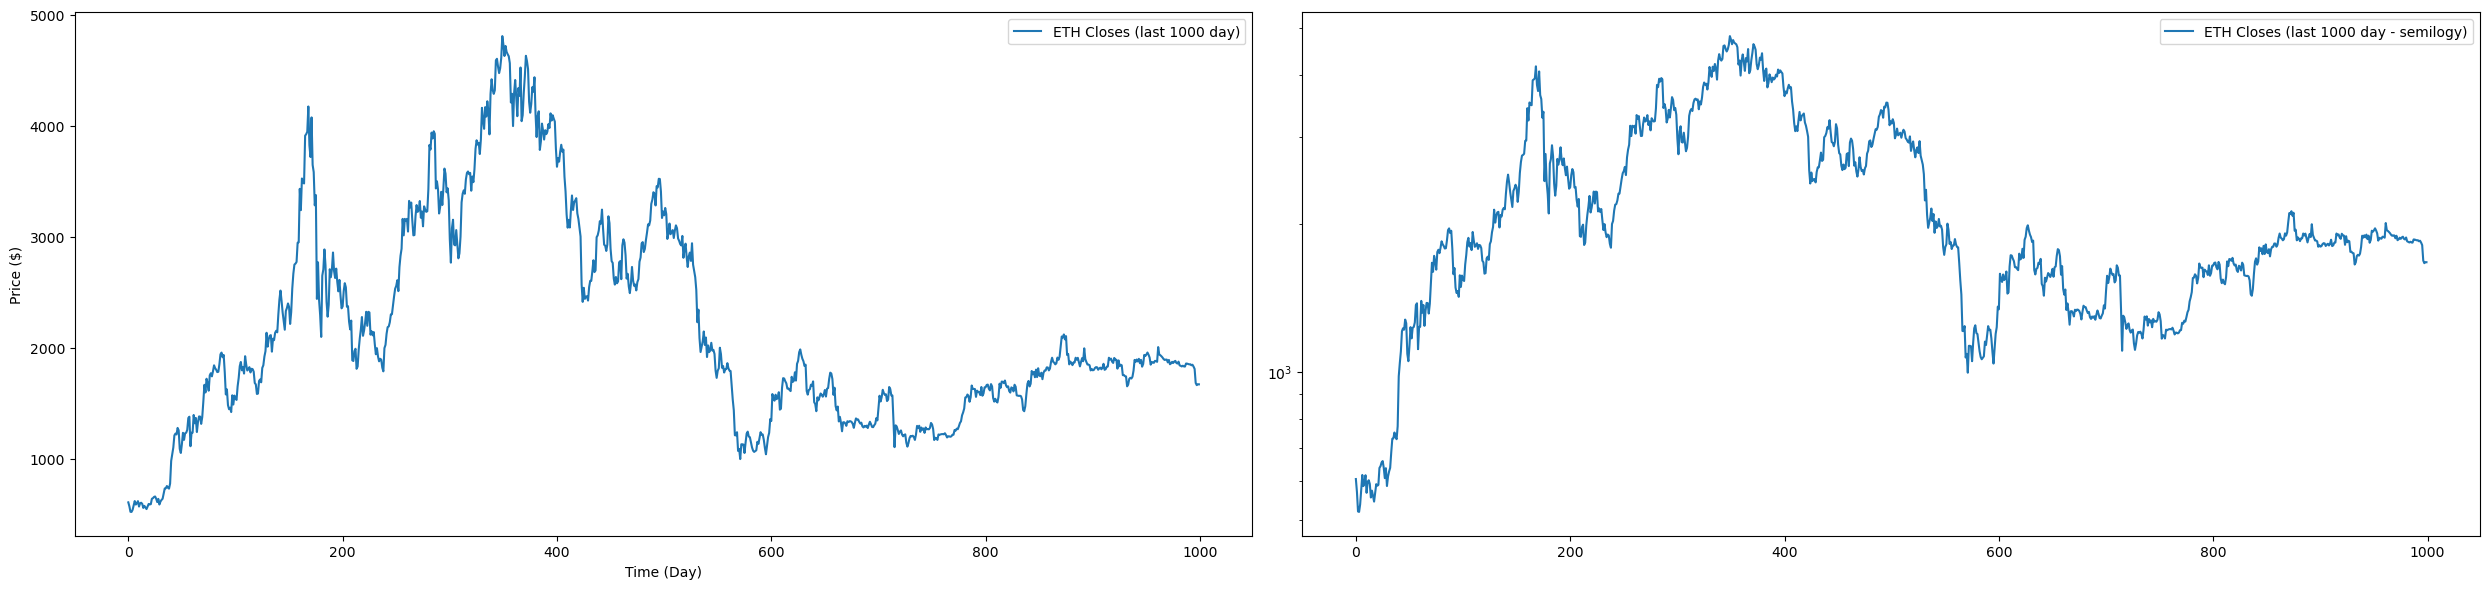

In [34]:
# Create a figure with a specific width and height
plt.figure(figsize=(25, 6))  

# Original plot
plt.subplot(1, 2, 1)
plt.plot(C, label='ETH Closes (last 1000 day)')
plt.xlabel('Time (Day)')
plt.ylabel('Price ($)')
plt.legend()

# plot with logarithmic y-axis
plt.subplot(1, 2, 2)
plt.semilogy(C, label='ETH Closes (last 1000 day - semilogy)')

plt.legend()

plt.tight_layout()  # This helps improve the layout of subplots
plt.show()


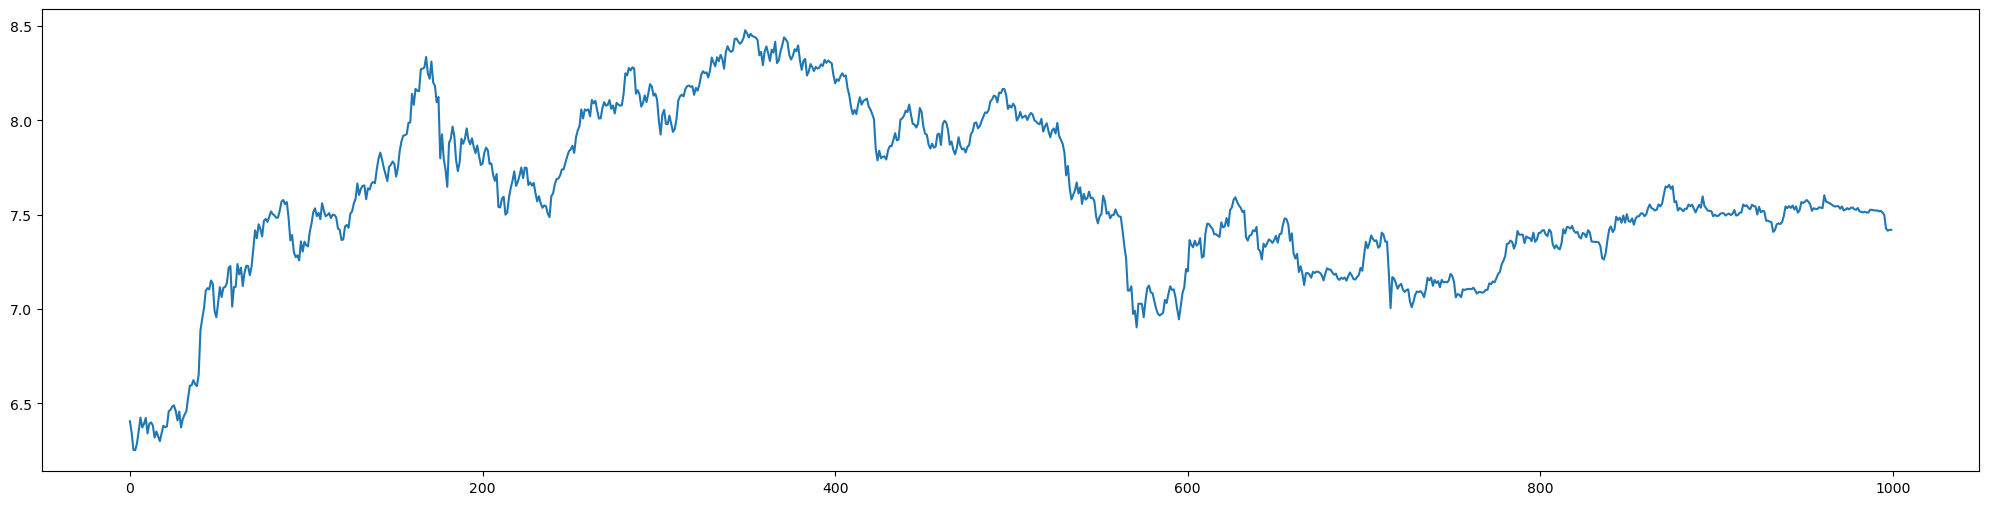

In [29]:
# Calculate the natural logarithm of the values in np array C
L = np.log(C)

# Create a new figure for plotting with a specific size
plt.figure(figsize=(25, 6)) 

# Plot the logarithmic data using a line plot
plt.plot(L)
plt.show()

In [30]:
# here we define a function to do all the previous process automatically 
# to get Close and log values

def Fetch(Symbol:str,Market:str = 'USD'):
    URL = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol={}&market={}&apikey=40JZ9H019YD6ZUCI&datatype=csv'.format(Symbol,Market)

    Columns = ['timestamp','open (USD)','high (USD)','low (USD)','close (USD)','volume']

    DF = pd.read_csv(URL, sep=',', usecols=Columns, header=0)

    C = DF['close (USD)'].to_numpy()
    C = C[::-1].copy()

    L = np.log(C)
    
    return C,L


 Fetcheing historical cryptocurrency price data for Ethereum and Bitcoin, and then creates a side-by-side comparison of the closing price trends for both cryptocurrencies in two subplots within a single figure.This visualization can give you an idea of the correlation between the price movements of these two cryptocurrencies(BTC & ETH) over time.

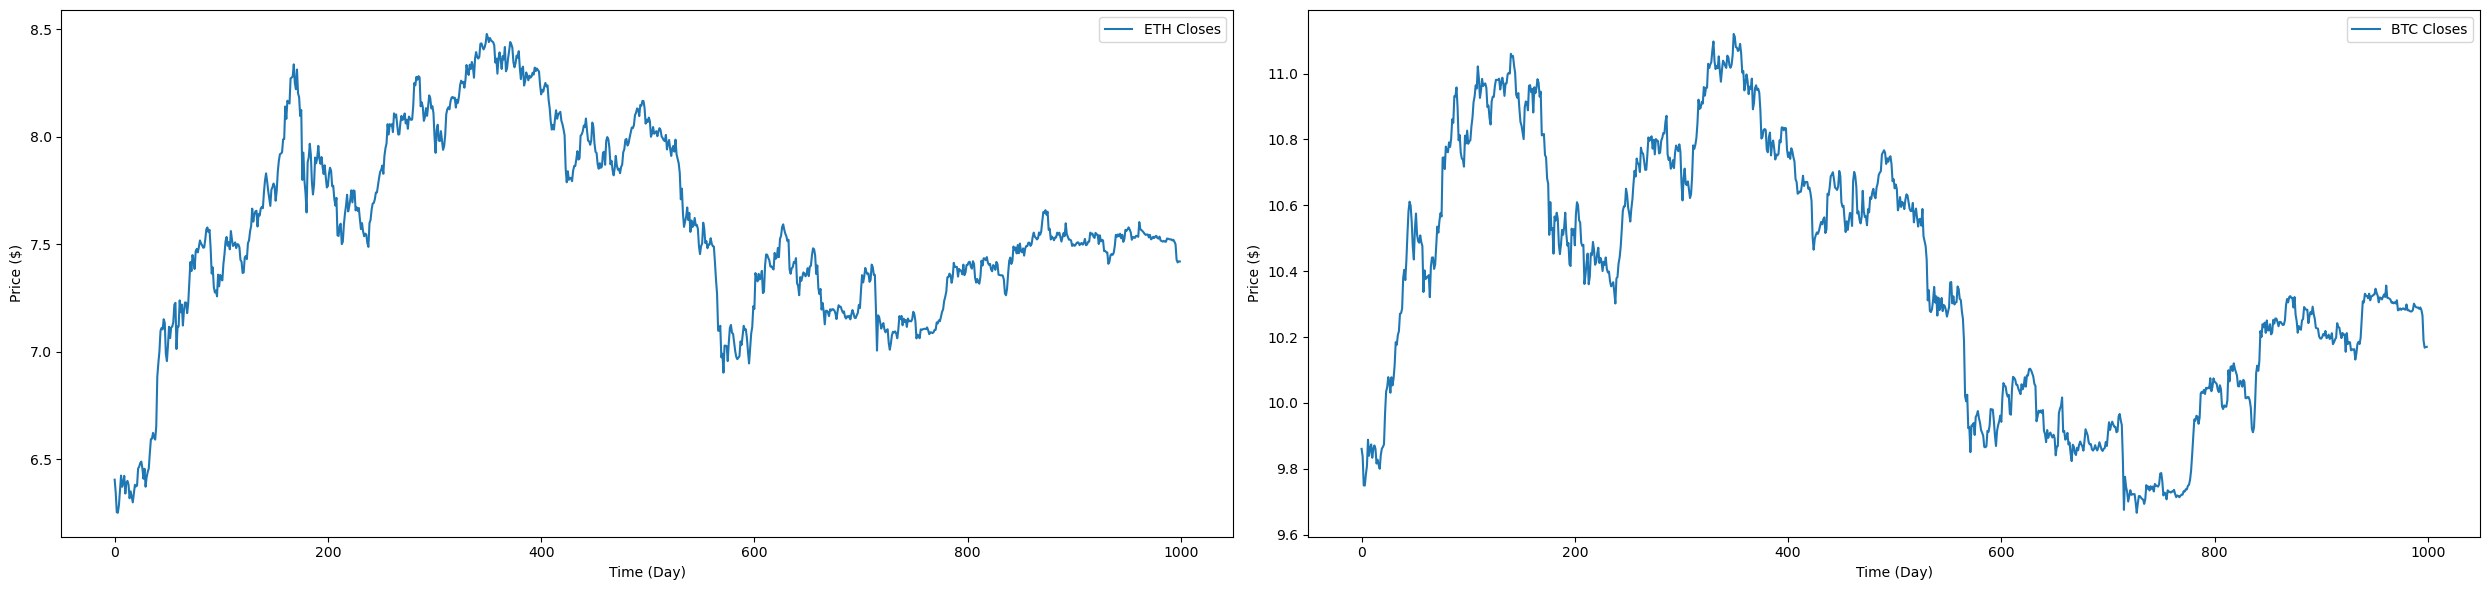

In [33]:
## retrieving values 
Ceth, Leth = Fetch('ETH')
Cbtc, Lbtc = Fetch('BTC')

# Create a figure with a specific width and height
plt.figure(figsize=(25, 6))  

# plot eth logarithmic 
plt.subplot(1, 2, 1)
plt.plot(Leth, label='ETH Closes')
plt.xlabel('Time (Day)')
plt.ylabel('Price ($)')
plt.legend()

# plot btc logarithmic 
plt.subplot(1, 2, 2)
plt.plot(Lbtc, label='BTC Closes')
plt.xlabel('Time (Day)')
plt.ylabel('Price ($)')
plt.legend()


plt.tight_layout()  # This helps improve the layout of subplots
plt.show()

In this section, we intend to depict the proximity or correlation between two currencies using a distinct type of chart. We aim to employ a scatter plot to visualize this relationship, utilizing both regular and logarithmic data representations.

<function matplotlib.pyplot.show(close=None, block=None)>

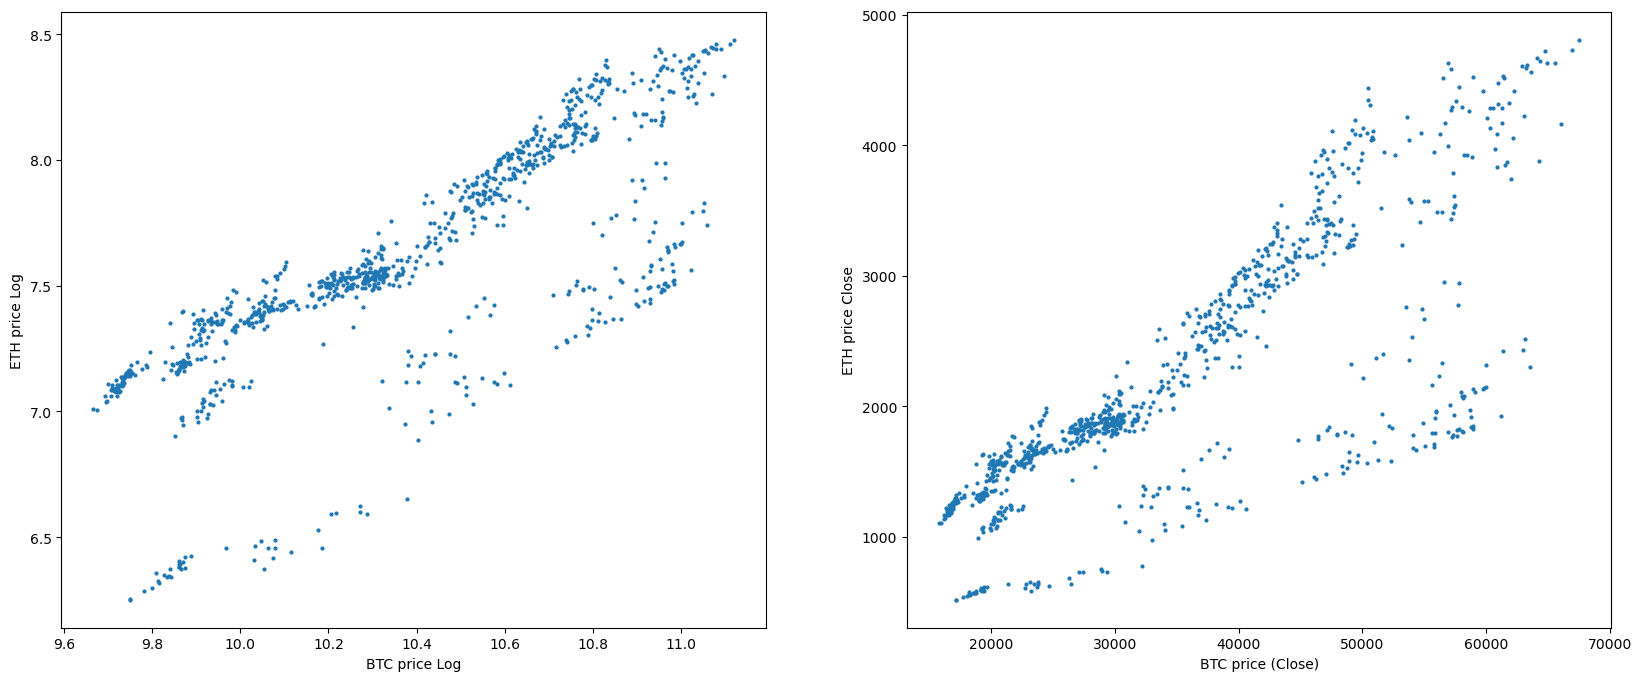

In [49]:
plt.figure(figsize=(20, 8)) 

#original Plot
plt.subplot(1, 2, 1)
plt.scatter(Lbtc, Leth, s=4)
plt.xlabel('BTC price Log')
plt.ylabel('ETH price Log')

## log plot
plt.subplot(1, 2, 2)
plt.scatter(Cbtc, Ceth, s=4)
plt.xlabel('BTC price (Close)')
plt.ylabel('ETH price Close')

plt.show


__In this section, we apply polynomial fitting to the data using the polyfit function. Subsequently, we present a 
linear regression on the chart. Through this, we will observe the logical relationship between the data of two 
currencies within the specified time interval

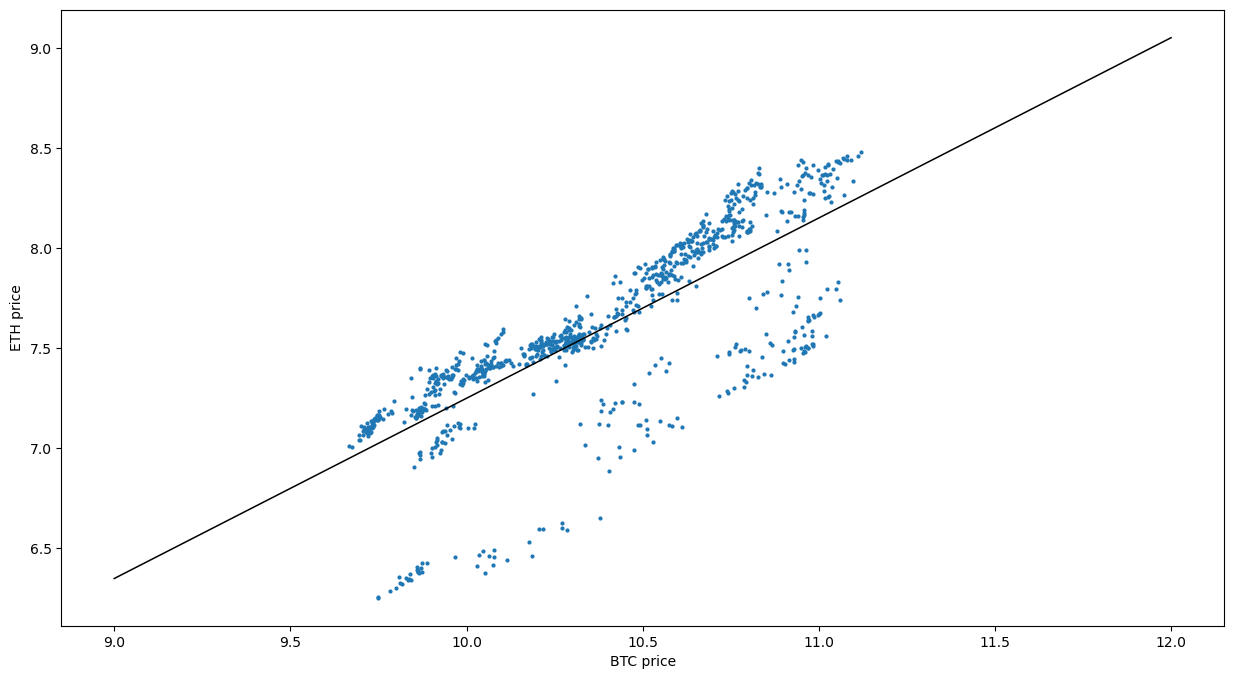

In [58]:
Cs = np.polyfit(Lbtc,Leth, 1)
p = np.poly1d(Cs)

plt.figure(figsize=(15, 8)) 
plt.scatter(Lbtc, Leth, s=4)
plt.plot([9,12],[p(9),p(12)], label = 'Linear Regression', linewidth = 1.1, c='k')
plt.xlabel('BTC price')
plt.ylabel('ETH price')
plt.show()

In [ ]:
# To see the relation in Math we have this 

In [59]:
Cs

array([ 0.90133726, -1.76471812])

In [64]:
Relation = '{}x + {}'.format(str(Cs[0]),str(Cs[1]))
print('The price of Eth is :',Relation, '   x is the price of Btc')

The price of Eth is : 0.9013372572606331x + -1.7647181166008263    x is the price of Btc


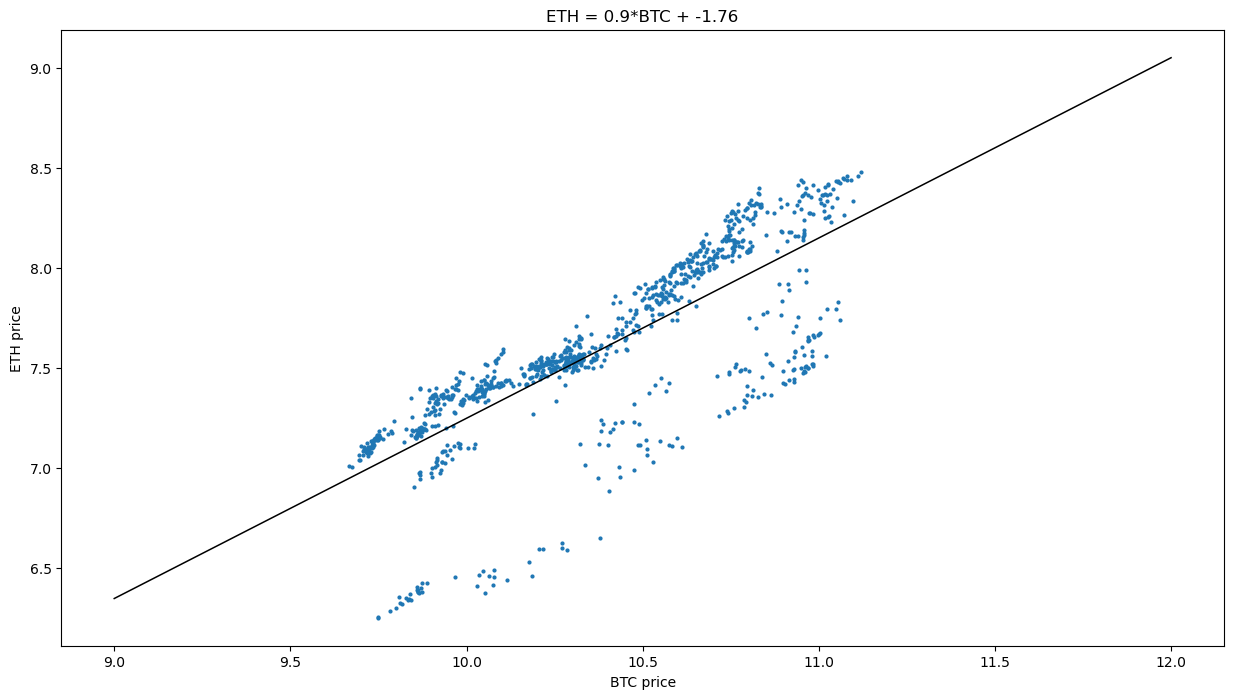

In [67]:
Relation =  'log(ETH) = {}*log(BTC) + {}'.format(str(round(Cs[0], 2)),str(round(Cs[1], 2)))

plt.figure(figsize=(15, 8)) 

plt.scatter(Lbtc, Leth, s=4)
plt.plot([9,12],[p(9),p(12)], label = 'Linear Regression', linewidth = 1.1, c='k')
plt.title(Relation)
plt.xlabel('log(BTC price)')
plt.ylabel('log(ETH price)')
plt.show()

In [69]:
BTC = 10
ETH = 0.9 * 10 + (-1.76)
ETH

7.24

Finally we want to find the correlaiton between the values of two Eth and Btc with {pearson correlation coefficient}.
This coefficient indicates that when all the data points align along a line, the value tends to be close to 1.

In [71]:
PCC, _ = stt.pearsonr(Lbtc, Leth)

print(PCC)

0.7817225531740861


-1 <= PCC <= +1 --> if pcc is close to +1 or -1 so the correlation is high and if it is close to 0 so the correlation is low


It's important to highlight that the correlation between BTC and ETH from 2018 to 2021 was 0.95. This suggests a shift
in the market dynamics, indicating a reduced dependence on BTC as the primary influencer.